In [348]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import json
import matplotlib.pyplot as plt
import isodate
import datetime
import time

In [349]:
cleaned_us_data_df = "output/cleaned_us_data.csv"

In [350]:
cleaned_us_data_df = pd.read_csv(cleaned_us_data_df)

In [351]:
cleaned_us_data_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'trending_date_formatted', 'trending_day', 'trending_month',
       'trending_year', 'trending_date_formatted_order',
       'publish_time_formatted', 'publish_day', 'publish_month',
       'publish_year', 'tag_count'],
      dtype='object')

In [352]:
cleaned_us_data_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 17:13:01+00:00,Monday,November,2017,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 07:30:00+00:00,Monday,November,2017,4
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 19:05:24+00:00,Sunday,November,2017,23
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 11:00:04+00:00,Monday,November,2017,27
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 18:01:41+00:00,Sunday,November,2017,14


In [353]:
cleaned_us_data_df["video_id"].nunique()

6347

In [354]:
video_trend_frequency = (cleaned_us_data_df["video_id"].value_counts())
video_trend_frequency

j4KvrAUjn6c    30
t4pRQ0jn23Q    29
QBL8IRJ5yHU    29
8h--kFui1JA    29
r-3iathMo7o    29
               ..
yW6ORWYn3g0     1
l7VfDVVxiMM     1
PWrsHhAuVZg     1
1QR-GsZkE3E     1
s0QeTtDix80     1
Name: video_id, Length: 6347, dtype: int64

In [355]:
video_frequency_df = pd.DataFrame(video_trend_frequency)
video_frequency_df = video_frequency_df.reset_index()
video_frequency_df.columns = ["video_id","Total Days Trending"]
# video_frequency_df.columns = ["Total Days Trending"]
video_frequency_df

,video_id,Total Days Trending
0,j4KvrAUjn6c,30
1,t4pRQ0jn23Q,29
2,QBL8IRJ5yHU,29
3,8h--kFui1JA,29
4,r-3iathMo7o,29
...,...,...
6342,yW6ORWYn3g0,1
6343,l7VfDVVxiMM,1
6344,PWrsHhAuVZg,1
6345,1QR-GsZkE3E,1


In [356]:
video_id_publish_time_day_df = pd.merge(video_frequency_df,cleaned_us_data_df, how = "inner",on=["video_id"])
video_id_publish_time_day_df = video_id_publish_time_day_df.groupby("video_id").head(1)
video_id_publish_time_day_df

,video_id,Total Days Trending,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,j4KvrAUjn6c,30,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,...,2018-05-14,Monday,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30
30,t4pRQ0jn23Q,29,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 14:00:03+00:00,Monday,May,2018,25
59,QBL8IRJ5yHU,29,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 19:00:01+00:00,Monday,May,2018,47
88,8h--kFui1JA,29,18.10.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,...,2018-05-10,Thursday,May,2018,10/05/2018,2018-05-09 17:00:00+00:00,Wednesday,May,2018,5
117,r-3iathMo7o,29,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-13 19:00:25+00:00,Sunday,May,2018,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40887,yW6ORWYn3g0,1,18.12.01,Charlamagne Defends Ginuwine After Being Label...,Breakfast Club Power 105.1 FM,24,2018-01-09T18:57:43.000Z,"the breakfast club|""power1051""|""celebrity news...",393742,11658,...,2018-01-12,Friday,January,2018,12/01/2018,2018-01-09 18:57:43+00:00,Tuesday,January,2018,10
40888,l7VfDVVxiMM,1,17.23.11,Proto-Putty in Liquid Nitrogen & Other Crazy T...,The King of Random,27,2017-11-22T12:00:02.000Z,"proto putty|""proto""|""putty""|""diy""|""do it yours...",589827,11839,...,2017-11-23,Thursday,November,2017,23/11/2017,2017-11-22 12:00:02+00:00,Wednesday,November,2017,36
40889,PWrsHhAuVZg,1,17.04.12,"Queen Biopic Stops Production, Avengers Fighti...",John Campea,24,2017-12-02T17:54:53.000Z,"Avengers|""Infinity War""|""Trailer""|""Aliens""|""Th...",30469,1024,...,2017-12-04,Monday,December,2017,04/12/2017,2017-12-02 17:54:53+00:00,Saturday,December,2017,15
40890,1QR-GsZkE3E,1,18.25.01,Aaron Paul Reveals What NOT to Say to Your Wif...,Jimmy Kimmel Live,24,2018-01-24T10:00:01.000Z,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",148659,2325,...,2018-01-25,Thursday,January,2018,25/01/2018,2018-01-24 10:00:01+00:00,Wednesday,January,2018,28


In [357]:
# from datetime import datetime
# from datetime import time

# hours_list = []
# minutes_list = []

# for video in video_id_publish_time_day_df['publish_time_formatted']:
#     t = datetime(video)
#     date_time_str = t.strptime("%Y%m%d %H:%M%S")
    
#     hours_list.append(t.hour)
#     minutes_list.append(t.minute)
# # Saving it to a column in the dataframe
# video_id_publish_time_day_df['publish_hour'] = hours_list
# video_id_publish_time_day_df['publish_minutes'] = minutes_list
# video_id_publish_time_day_df

In [358]:
video_id_publish_time_day_df

,video_id,Total Days Trending,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,j4KvrAUjn6c,30,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,...,2018-05-14,Monday,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30
30,t4pRQ0jn23Q,29,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 14:00:03+00:00,Monday,May,2018,25
59,QBL8IRJ5yHU,29,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 19:00:01+00:00,Monday,May,2018,47
88,8h--kFui1JA,29,18.10.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,...,2018-05-10,Thursday,May,2018,10/05/2018,2018-05-09 17:00:00+00:00,Wednesday,May,2018,5
117,r-3iathMo7o,29,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-13 19:00:25+00:00,Sunday,May,2018,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40887,yW6ORWYn3g0,1,18.12.01,Charlamagne Defends Ginuwine After Being Label...,Breakfast Club Power 105.1 FM,24,2018-01-09T18:57:43.000Z,"the breakfast club|""power1051""|""celebrity news...",393742,11658,...,2018-01-12,Friday,January,2018,12/01/2018,2018-01-09 18:57:43+00:00,Tuesday,January,2018,10
40888,l7VfDVVxiMM,1,17.23.11,Proto-Putty in Liquid Nitrogen & Other Crazy T...,The King of Random,27,2017-11-22T12:00:02.000Z,"proto putty|""proto""|""putty""|""diy""|""do it yours...",589827,11839,...,2017-11-23,Thursday,November,2017,23/11/2017,2017-11-22 12:00:02+00:00,Wednesday,November,2017,36
40889,PWrsHhAuVZg,1,17.04.12,"Queen Biopic Stops Production, Avengers Fighti...",John Campea,24,2017-12-02T17:54:53.000Z,"Avengers|""Infinity War""|""Trailer""|""Aliens""|""Th...",30469,1024,...,2017-12-04,Monday,December,2017,04/12/2017,2017-12-02 17:54:53+00:00,Saturday,December,2017,15
40890,1QR-GsZkE3E,1,18.25.01,Aaron Paul Reveals What NOT to Say to Your Wif...,Jimmy Kimmel Live,24,2018-01-24T10:00:01.000Z,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",148659,2325,...,2018-01-25,Thursday,January,2018,25/01/2018,2018-01-24 10:00:01+00:00,Wednesday,January,2018,28


In [359]:
# video_id_publish_time_day_df = cleaned_us_data_df.loc[video_frequency_df["Video Id"]]
# video_id_publish_time_day_df = video_id_publish_time_day_df.groupby("video_id").head(1)
# video_id_publish_time_day_df

How to extract time from publish_date_formatted column = y-axis
Call it publish_time

In [360]:
# time_count = video_id_publish_time_day_df["publish_time"].value_counts()
# time_count_df = pd.DataFrame(time_count)
# time_count_df = time_count_df.reset_index()
# time_count_df.columns = ["Publishing Time","Total per Time of Day"]
# time_count_df

In [361]:
# time_count_df.to_csv("Fig1PublishTimeSummaryStatistics.csv", index = False, header=True)

In [362]:
# x_axis = time_count_df["Publishing Time"]
# y_axis = time_count_df["Total per Time of Day"]
# plt.bar(x_axis, y_axis, color='purple', align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, x_axis, rotation='vertical')
# # plt.xlim(-0.75, len(days_20)-0.25)
# # plt.ylim(0, max(day_count_20)+2)
# plt.xlabel("Time Published")
# plt.ylabel("Total per Time of Day")
# plt.title("Unique Video_ids and Time Published")
# plt.show()
# plt.savefig("ImagesObj3/Fig1PublishTime.png", dpi=100)

In [363]:
day_count = video_id_publish_time_day_df["publish_day"].value_counts()
day_count_df = pd.DataFrame(day_count)
day_count_df = day_count_df.reset_index()
day_count_df.columns = ["Publishing Day","Total per day of the week"]
day_count_df

,Publishing Day,Total per day of the week
0,Wednesday,1096
1,Tuesday,1061
2,Thursday,1053
3,Friday,1046
4,Monday,985
5,Sunday,559
6,Saturday,547


In [364]:
# day_count_df.to_csv("Fig2PublishDaySummaryStatistics.csv", index = False, header=True)

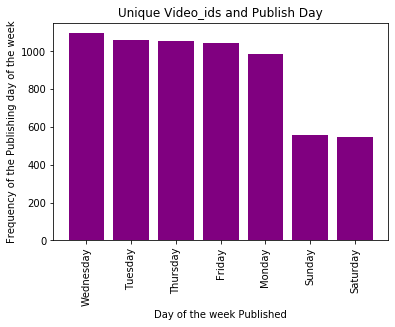

<Figure size 432x288 with 0 Axes>

In [365]:
x_axis = day_count_df["Publishing Day"]
y_axis = day_count_df["Total per day of the week"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Unique Video_ids and Publish Day")
plt.show()
plt.savefig("ImagesObj3/Fig2PublishDay.png", dpi=100)

In [366]:
month_count = video_id_publish_time_day_df["publish_month"].value_counts()
month_count_df = pd.DataFrame(month_count)
month_count_df = month_count_df.reset_index()
month_count_df.columns = ["Publishing Month","Total per Month"]
month_count_df

,Publishing Month,Total per Month
0,January,1268
1,December,1165
2,February,995
3,November,972
4,March,688
5,May,539
6,April,536
7,June,147
8,October,17
9,September,10


In [367]:
# month_count_df.to_csv("Fig3PublishMonthSummaryStatistics.csv", index = False, header=True)

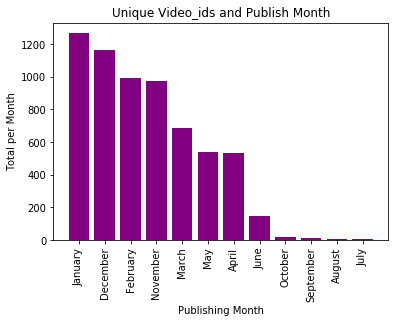

<Figure size 432x288 with 0 Axes>

In [368]:
x_axis = month_count_df["Publishing Month"]
y_axis = month_count_df["Total per Month"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Publishing Month")
plt.ylabel("Total per Month")
plt.title("Unique Video_ids and Publish Month")
plt.show()
plt.savefig("ImagesObj3/Fig3PublishMonth.png", dpi=100)

In [369]:
video_category = video_id_publish_time_day_df["category_name"].value_counts()
video_category_df = pd.DataFrame(video_category)
video_category_df = video_category_df.reset_index()
video_category_df.columns = ["Video Category","Total per category"]
video_category_df

,Video Category,Total per category
0,Entertainment,1619
1,Music,799
2,Howto & Style,595
3,Comedy,547
4,News & Politics,505
5,People & Blogs,498
6,Sports,451
7,Science & Technology,380
8,Film & Animation,318
9,Education,250


In [370]:
# video_category_df.to_csv("Fig4PublishVideoCategorySummaryStatistics.csv", index = False, header=True)

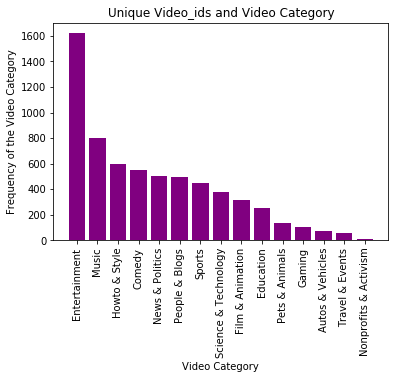

<Figure size 432x288 with 0 Axes>

In [371]:
x_axis = video_category_df["Video Category"]
y_axis = video_category_df["Total per category"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Video Category")
plt.ylabel("Frequency of the Video Category")
plt.title("Unique Video_ids and Video Category")
plt.show()
plt.savefig("ImagesObj3/Fig4Category.png", dpi=100)

In [372]:
video_frequency_df.head(20)

,video_id,Total Days Trending
0,j4KvrAUjn6c,30
1,t4pRQ0jn23Q,29
2,QBL8IRJ5yHU,29
3,8h--kFui1JA,29
4,r-3iathMo7o,29
5,MAjY8mCTXWk,29
6,NBSAQenU2Bk,29
7,iILJvqrAQ_w,29
8,mdWcaWBxxcY,28
9,ulNswX3If6U,28


In [373]:
video_id_top_20_publish_time_day_df = video_id_publish_time_day_df.head(20)
video_id_top_20_publish_time_day_df

,video_id,Total Days Trending,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,j4KvrAUjn6c,30,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,...,2018-05-14,Monday,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30
30,t4pRQ0jn23Q,29,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 14:00:03+00:00,Monday,May,2018,25
59,QBL8IRJ5yHU,29,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 19:00:01+00:00,Monday,May,2018,47
88,8h--kFui1JA,29,18.10.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,...,2018-05-10,Thursday,May,2018,10/05/2018,2018-05-09 17:00:00+00:00,Wednesday,May,2018,5
117,r-3iathMo7o,29,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-13 19:00:25+00:00,Sunday,May,2018,37
146,MAjY8mCTXWk,29,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 15:59:47+00:00,Monday,May,2018,17
175,NBSAQenU2Bk,29,18.15.05,Rooster Teeth Animated Adventures - Millie So ...,Rooster Teeth,1,2018-05-14T13:00:01.000Z,"Rooster Teeth|""RT""|""animation""|""television""|""f...",404162,17920,...,2018-05-15,Tuesday,May,2018,15/05/2018,2018-05-14 13:00:01+00:00,Monday,May,2018,46
204,iILJvqrAQ_w,29,18.12.05,Charlie Puth - BOY [Official Audio],Charlie Puth,10,2018-05-11T04:00:34.000Z,"charlie puth|""boy""|""charlie""|""puth""|""atlantic""...",981789,55917,...,2018-05-12,Saturday,May,2018,12/05/2018,2018-05-11 04:00:34+00:00,Friday,May,2018,18
233,mdWcaWBxxcY,28,18.13.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",2766850,149643,...,2018-05-13,Sunday,May,2018,13/05/2018,2018-05-11 09:23:16+00:00,Friday,May,2018,8
261,ulNswX3If6U,28,18.12.05,Selena Gomez - Back To You (Lyric Video),Selena Gomez,1,2018-05-10T16:00:11.000Z,"selena gomez|""13 reasons why""|""back to you""|""s...",3969429,409750,...,2018-05-12,Saturday,May,2018,12/05/2018,2018-05-10 16:00:11+00:00,Thursday,May,2018,7


In [374]:
# video_id_top_20_publish_time_day = cleaned_us_data_df.loc[video_frequency_df.head(20)["Video Ids"]]
# video_id_top_20_publish_time_day_df = video_id_top_20_publish_time_day.groupby("video_id").head(1)
# video_id_top_20_publish_time_day_df

How to extract time from publish_date_formatted column = y-axis
Call it publish_time

In [375]:
# top_20_time_count = video_id_top_20_publish_time_day_df["publish_time"].value_counts()
# top_20_time_count_df = pd.DataFrame(top_20_time_count)
# top_20_time_count_df = top_20_time_count_df.reset_index()
# top_20_time_count_df.columns = ["Publishing Time","Total per Time of Day"]
# top_20_time_count_df

In [376]:
# top_20_time_count_df.to_csv("Fig5PublishTimeSummaryStatistics.csv", index = False, header=True)

In [377]:
# x_axis = top_20_time_count_df["Publishing Time"]
# y_axis = top_20_time_count_df["Total per Time of Day"]
# plt.bar(x_axis, y_axis, color='purple', align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, x_axis, rotation='vertical')
# # plt.xlim(-0.75, len(days_20)-0.25)
# # plt.ylim(0, max(day_count_20)+2)
# plt.xlabel("Time Published")
# plt.ylabel("Total per Time of Day")
# plt.title("Top 20 Video_ids and Time Published")
# plt.show()
# plt.savefig("ImagesObj3/Fig5PublishTime.png", dpi=100)

In [378]:
top_20_day_count = video_id_top_20_publish_time_day_df["publish_day"].value_counts()
top_20_day_count_df = pd.DataFrame(top_20_day_count)
top_20_day_count_df = top_20_day_count_df.reset_index()
top_20_day_count_df.columns = ["Publishing Day","Total per day of the week"]
top_20_day_count_df


,Publishing Day,Total per day of the week
0,Monday,5
1,Sunday,4
2,Thursday,4
3,Friday,3
4,Wednesday,2
5,Tuesday,1
6,Saturday,1


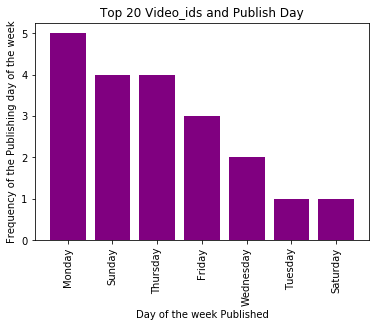

<Figure size 432x288 with 0 Axes>

In [379]:
x_axis = top_20_day_count_df["Publishing Day"]
y_axis = top_20_day_count_df["Total per day of the week"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Top 20 Video_ids and Publish Day")
plt.show()
plt.savefig("ImagesObj3/Fig6Top20Day.png", dpi=100)

In [380]:
top_20_month_count = video_id_top_20_publish_time_day_df["publish_month"].value_counts()
top_20_month_count_df = pd.DataFrame(top_20_month_count)
top_20_month_count_df = top_20_month_count_df.reset_index()
top_20_month_count_df.columns = ["Publishing Month","Total per Month"]
top_20_month_count_df

,Publishing Month,Total per Month
0,May,20


In [381]:
top_20_video_category = video_id_top_20_publish_time_day_df["category_name"].value_counts()
top_20_video_category_df = pd.DataFrame(top_20_video_category)
top_20_video_category_df = top_20_video_category_df.reset_index()
top_20_video_category_df.columns = ["Video Category","Total per category"]
top_20_video_category_df

,Video Category,Total per category
0,Entertainment,6
1,Music,5
2,Film & Animation,3
3,Science & Technology,2
4,Comedy,2
5,Education,1
6,Howto & Style,1


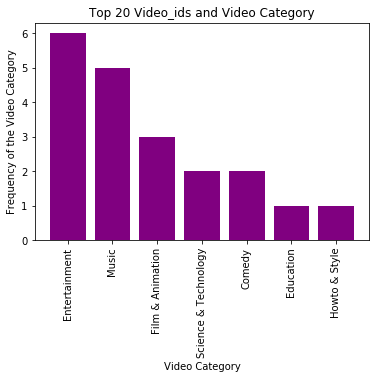

<Figure size 432x288 with 0 Axes>

In [382]:
x_axis = top_20_video_category_df["Video Category"]
y_axis = top_20_video_category_df["Total per category"]
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Video Category")
plt.ylabel("Frequency of the Video Category")
plt.title("Top 20 Video_ids and Video Category")
plt.show()
plt.savefig("ImagesObj3/Fig7Top20Category.png", dpi=100)

In [383]:
video_id_20 = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U","mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"]
publish_time_20 = [18, 17, 19, 16, 14, 19, 4, 13, 20, 16, 9, 12, 17, 21, 13, 17, 21, 11, 13, 4]

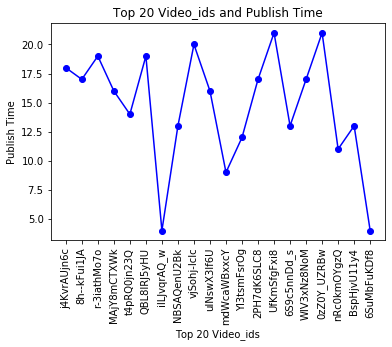

In [384]:
x_axis = video_id_20
y_axis = publish_time_20
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Top 20 Video_ids")
plt.ylabel("Publish Time")
plt.title("Top 20 Video_ids and Publish Time")
plt.gcf
plt.show()

In [385]:
video_id_20 = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U","mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"]
publish_day_20 = ["Sunday", "Wednesday", "Sunday", "Monday", "Monday","Monday", "Friday", "Monday", "Thursday", "Thursday", "Friday", "Sunday", "Thursday", "Friday", "Tuesday", "Thursday", "Thursday","Saturday", "Sunday", "Thursday"]
category_name_20 = ["Entertainment","Music","Science & Technology","Howto & Style","Film & Animation","Education"]
category_count_20 = [6,6,2,2,3,1]
days_20 =[ "Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday",]
day_count_20 = [4, 1, 1, 6, 3, 1, 4]
publish_month_20 = []
colors = ["orange","purple","green","lightblue","yellow","pink","red"]

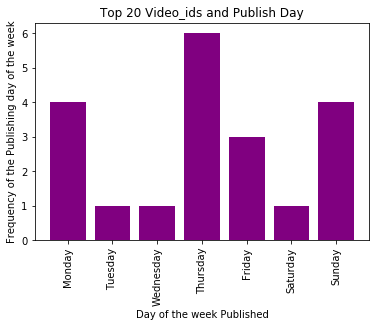

In [386]:
plt.bar(days_20, day_count_20, color='purple', align="center")
tick_locations = [value for value in days_20]
plt.xticks(tick_locations, days_20, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Top 20 Video_ids and Publish Day")
plt.show()

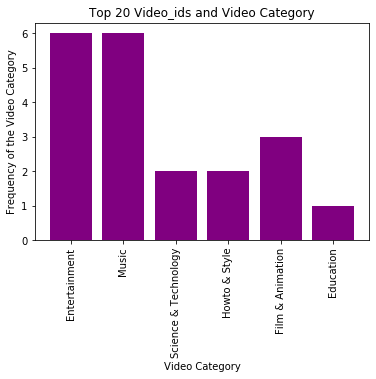

In [387]:
plt.bar(category_name_20, category_count_20, color='purple', align="center")
tick_locations = [value for value in category_name_20]
plt.xticks(tick_locations, category_name_20, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Video Category")
plt.ylabel("Frequency of the Video Category")
plt.title("Top 20 Video_ids and Video Category")
plt.show()

In [388]:
unique_videos_df = cleaned_us_data_df.groupby(["video_id"]).head(1)

In [389]:
video_publish_day = (unique_videos_df['publish_day'].value_counts())
video_publish_day

Wednesday    1096
Tuesday      1061
Thursday     1053
Friday       1046
Monday        985
Sunday        559
Saturday      547
Name: publish_day, dtype: int64

In [390]:
video_publish_day.sum()

6347

In [391]:
unique_video_publish_day_df = pd.DataFrame([video_publish_day])
unique_video_publish_day_df

,Wednesday,Tuesday,Thursday,Friday,Monday,Sunday,Saturday
publish_day,1096,1061,1053,1046,985,559,547


In [392]:
total_days =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
total_days_count = [985, 1061, 1096, 1053, 1046, 547, 559]

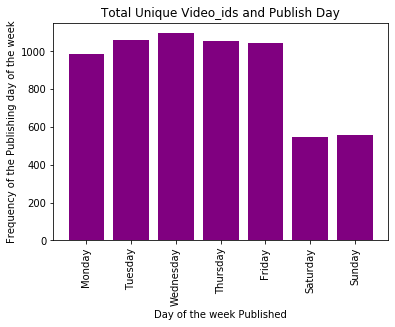

In [393]:
plt.bar(total_days, total_days_count, color='purple', align="center")
tick_locations = [value for value in total_days]
plt.xticks(tick_locations, total_days, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Total Unique Video_ids and Publish Day")
plt.show()

In [394]:
video_publish_month = (unique_videos_df['publish_month'].value_counts())
video_publish_month

January      1268
December     1165
February      995
November      972
March         688
May           539
April         536
June          147
October        17
September      10
August          6
July            4
Name: publish_month, dtype: int64

In [395]:
video_publish_month.sum()

6347

In [396]:
unique_video_publish_month_df = pd.DataFrame([video_publish_month])
unique_video_publish_month_df

,January,December,February,November,March,May,April,June,October,September,August,July
publish_month,1268,1165,995,972,688,539,536,147,17,10,6,4


In [397]:
total_months =["January", "February", "March", "April", "May","June", "July", "August", "September", "October", "November","December"]
total_months_count = [1286, 995, 688, 536, 539, 147, 4, 6, 10, 17, 972, 1165]

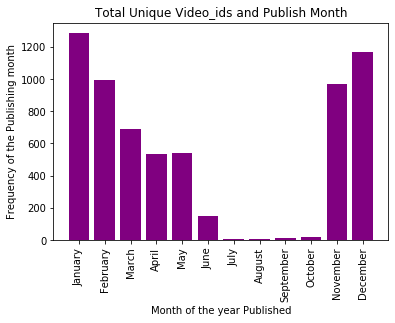

In [398]:
plt.bar(total_months, total_months_count, color='purple', align="center")
tick_locations = [value for value in total_months]
plt.xticks(tick_locations, total_months, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Month of the year Published")
plt.ylabel("Frequency of the Publishing month")
plt.title("Total Unique Video_ids and Publish Month")
plt.show()

In [399]:
video_publish_category = (unique_videos_df['category_name'].value_counts())
video_publish_category

Entertainment            1619
Music                     799
Howto & Style             595
Comedy                    547
News & Politics           505
People & Blogs            498
Sports                    451
Science & Technology      380
Film & Animation          318
Education                 250
Pets & Animals            138
Gaming                    103
Autos & Vehicles           70
Travel & Events            60
Nonprofits & Activism      14
Name: category_name, dtype: int64

In [400]:
video_publish_category.sum()

6347

In [401]:
video_frequency = pd.DataFrame(video_trend_frequency)
video_frequency.head(20)

,video_id
j4KvrAUjn6c,30
t4pRQ0jn23Q,29
QBL8IRJ5yHU,29
8h--kFui1JA,29
r-3iathMo7o,29
MAjY8mCTXWk,29
NBSAQenU2Bk,29
iILJvqrAQ_w,29
mdWcaWBxxcY,28
ulNswX3If6U,28


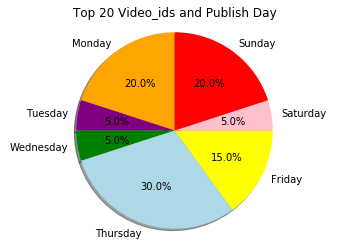

In [402]:
plt.pie(day_count_20, labels=days_20, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# plt.patch.set_facecolor("white")
plt.axis("equal")
plt.title("Top 20 Video_ids and Publish Day")
plt.show()

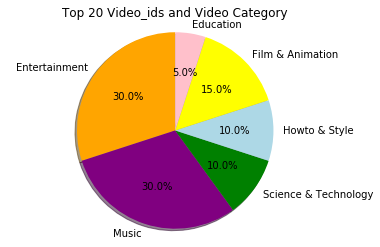

In [403]:
plt.pie(category_count_20, labels=category_name_20, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# plt.patch.set_facecolor("white")
plt.axis("equal")
plt.title("Top 20 Video_ids and Video Category")
plt.show()

In [404]:
# publish_time = []
# publish_day = []
# video_id = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U"]

# # j4KvrAUjn6c	30
# # 8h--kFui1JA	29
# # r-3iathMo7o	29
# # MAjY8mCTXWk	29
# # t4pRQ0jn23Q	29
# # QBL8IRJ5yHU	29
# # iILJvqrAQ_w	29
# # NBSAQenU2Bk	29
# # vjSohj-Iclc	28
# # ulNswX3If6U	28

# for item in video_id:
#     publish_time.append(cleaned_us_data_df['publish_time_formatted'])
#     publish_day.append(cleaned_us_data_df'publish_day')
 
# # Save to a new dataframe 
# publish_time_day_df=pd.DataFrame({"video_id": video_id, "Publish Time": publish_time, "Publish Day":publish_day})

In [405]:
# cleaned_us_data_df.set_index("video_id", inplace = True)

In [406]:
result_trend_1_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "j4KvrAUjn6c"]

In [407]:
result_trend_1_df.iloc[[0]]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
34516,j4KvrAUjn6c,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,...,2018-05-14,Monday,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30


In [408]:
publish_time_j4KvrAUjn6c= result_trend_1_df[['publish_time_formatted', 'publish_day']]
publish_time_j4KvrAUjn6c.head(1)

,publish_time_formatted,publish_day
34516,2018-05-13 18:03:56+00:00,Sunday


In [409]:
dates = list(result_trend_1_df["trending_date_formatted_order"])

In [410]:
views = list(result_trend_1_df["views"])

In [411]:
likes = list(result_trend_1_df["likes"])

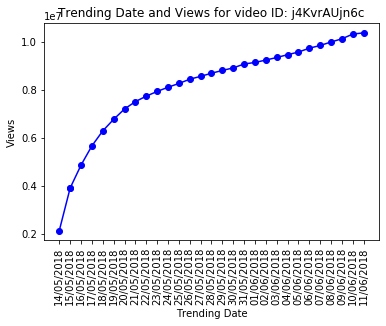

In [412]:
x_axis = dates
y_axis = views
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: j4KvrAUjn6c")
# plt.gcf
plt.show()

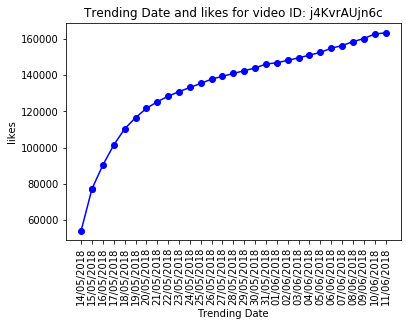

In [413]:
x_axis = dates
y_axis = likes
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("likes")
plt.title("Trending Date and likes for video ID: j4KvrAUjn6c")
# plt.gcf
plt.show()

In [414]:
result_trend_2_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "8h--kFui1JA"]

In [415]:
publish_time_8hkFui1JA = result_trend_2_df[['publish_time_formatted','publish_day']]
publish_time_8hkFui1JA.head(1)

,publish_time_formatted,publish_day
33718,2018-05-09 17:00:00+00:00,Wednesday


In [416]:
dates_2 = list(result_trend_2_df["trending_date_formatted_order"])

In [417]:
views_2 = list(result_trend_2_df["views"])

In [418]:
likes_2 = list(result_trend_2_df["likes"])

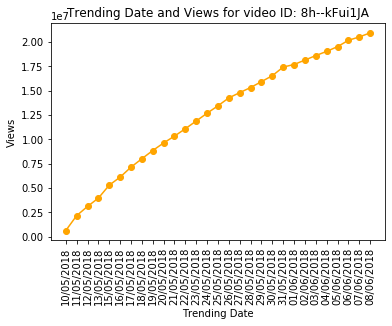

In [419]:
x_axis = dates_2
y_axis = views_2
plt.plot(x_axis,y_axis,marker='o', color='orange')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: 8h--kFui1JA")
# plt.gcf
plt.show()

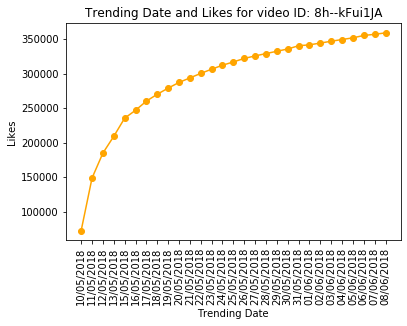

In [420]:
x_axis = dates_2
y_axis = likes_2
plt.plot(x_axis,y_axis,marker='o', color='orange')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Likes")
plt.title("Trending Date and Likes for video ID: 8h--kFui1JA")
# plt.gcf
plt.show()

In [421]:
result_trend_3_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "r-3iathMo7o"]


In [422]:
publish_time_r3iathMo7o = result_trend_3_df[['publish_time_formatted', 'publish_day']]
publish_time_r3iathMo7o.head(1)

,publish_time_formatted,publish_day
34725,2018-05-13 19:00:25+00:00,Sunday


In [423]:
dates_3 = list(result_trend_3_df["trending_date_formatted_order"])

In [424]:
views_3 = list(result_trend_3_df["views"])

In [425]:
likes_3 = list(result_trend_3_df["likes"])

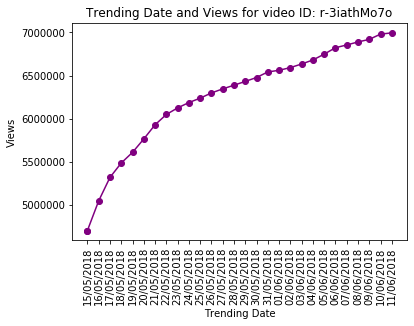

In [426]:
x_axis = dates_3
y_axis = views_3
plt.plot(x_axis,y_axis,marker='o', color='purple')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: r-3iathMo7o")
# plt.gcf
plt.show()

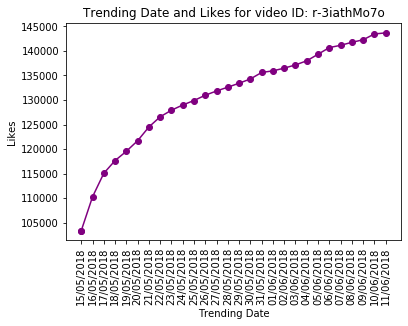

In [427]:
x_axis = dates_3
y_axis = likes_3
plt.plot(x_axis,y_axis,marker='o', color='purple')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Likes")
plt.title("Trending Date and Likes for video ID: r-3iathMo7o")
# plt.gcf
plt.show()

j4KvrAUjn6c	30
8h--kFui1JA	29
r-3iathMo7o	29
MAjY8mCTXWk	29
t4pRQ0jn23Q	29
QBL8IRJ5yHU	29
iILJvqrAQ_w	29
NBSAQenU2Bk	29
vjSohj-Iclc	28
ulNswX3If6U	28

In [428]:
result_trend_4_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "MAjY8mCTXWk"]

In [429]:
publish_time_MAjY8mCTXWk = result_trend_4_df[['publish_time_formatted', 'publish_day']]
publish_time_MAjY8mCTXWk.head(1)

,publish_time_formatted,publish_day
34719,2018-05-14 15:59:47+00:00,Monday


In [430]:
result_trend_5_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "t4pRQ0jn23Q"]

In [431]:
publish_time_t4pRQ0jn23Q = result_trend_5_df[['publish_time_formatted', 'publish_day']]
publish_time_t4pRQ0jn23Q.head(1)

,publish_time_formatted,publish_day
34717,2018-05-14 14:00:03+00:00,Monday


In [432]:
result_trend_6_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "QBL8IRJ5yHU"]

In [433]:
publish_time_QBL8IRJ5yHU = result_trend_6_df[['publish_time_formatted', 'publish_day']]
publish_time_QBL8IRJ5yHU.head(1)

,publish_time_formatted,publish_day
34716,2018-05-14 19:00:01+00:00,Monday


In [434]:
result_trend_7_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "iILJvqrAQ_w"]

In [435]:
publish_time_iILJvqrAQ_w = result_trend_7_df[['publish_time_formatted', 'publish_day']]
publish_time_iILJvqrAQ_w.head(1)

,publish_time_formatted,publish_day
34125,2018-05-11 04:00:34+00:00,Friday


In [436]:
result_trend_8_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "NBSAQenU2Bk"]

In [437]:
publish_time_NBSAQenU2Bk = result_trend_8_df[['publish_time_formatted', 'publish_day']]
publish_time_NBSAQenU2Bk.head(1)

,publish_time_formatted,publish_day
34726,2018-05-14 13:00:01+00:00,Monday


In [438]:
result_trend_9_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "vjSohj-Iclc"]

In [439]:
publish_time_vjSohjIclc = result_trend_9_df[['publish_time_formatted', 'publish_day']]
publish_time_vjSohjIclc.head(1)

,publish_time_formatted,publish_day
34119,2018-05-10 19:56:28+00:00,Thursday


In [440]:
result_trend_10_df = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"] == "ulNswX3If6U"]

In [441]:
publish_time_ulNswX3If6U = result_trend_10_df[['publish_time_formatted', 'publish_day']]
publish_time_ulNswX3If6U.head(1)

,publish_time_formatted,publish_day
34130,2018-05-10 16:00:11+00:00,Thursday


In [442]:
publish_time_day_df = cleaned_us_data_df.groupby(["video_id"])
# publish_time_day_df.reset_index(inplace=True)
# publish_time_day_df["trending_date"].count()

In [443]:
publish_df = publish_time_day_df[['publish_time_formatted', 'publish_day', 'publish_month']]
publish_df.head(15)

,publish_time_formatted,publish_day,publish_month
0,2017-11-13 17:13:01+00:00,Monday,November
1,2017-11-13 07:30:00+00:00,Monday,November
2,2017-11-12 19:05:24+00:00,Sunday,November
3,2017-11-13 11:00:04+00:00,Monday,November
4,2017-11-12 18:01:41+00:00,Sunday,November
...,...,...,...
40838,2018-05-26 16:00:04+00:00,Saturday,May
40875,2018-05-22 02:34:39+00:00,Tuesday,May
40876,2018-05-20 21:00:00+00:00,Sunday,May
40883,2018-05-18 17:13:08+00:00,Friday,May


In [444]:
cleaned_us_data_df["publish_time_formatted"]

0        2017-11-13 17:13:01+00:00
1        2017-11-13 07:30:00+00:00
2        2017-11-12 19:05:24+00:00
3        2017-11-13 11:00:04+00:00
4        2017-11-12 18:01:41+00:00
                   ...            
40887    2018-05-18 13:00:04+00:00
40888    2018-05-18 01:00:06+00:00
40889    2018-05-18 17:34:22+00:00
40890    2018-05-17 17:00:04+00:00
40891    2018-05-17 17:09:38+00:00
Name: publish_time_formatted, Length: 40892, dtype: object

In [445]:
video_frequency = pd.DataFrame(video_trend_frequency)
video_frequency.tail(20)

,video_id
Lgdc2t_CldQ,1
hf_YjzEvYeQ,1
Djw1PmpZt9w,1
k3tWCZu42PQ,1
N-3NfWJHNhg,1
X-5yy4ETxlQ,1
1yf8ZSjtXiI,1
mwpHSMv1pI4,1
MLTwWIeiA24,1
EOmcGbXsRM8,1


"JR4oPuV3CWg", "qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"

In [446]:
# publish_time_day_bottom_20 = cleaned_us_data_df.iloc[["JR4oPuV3CWg","qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"]]
# publish_time_day_bottom_20.groupby("video_id").head(1)

In [447]:
# video_id_bottom_20 = ["JR4oPuV3CWg", "qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"]
# publish_time_bottom_20 = []

In [448]:
# x_axis = video_id_bottom_20
# y_axis = publish_time_bottom_20
# plt.plot(x_axis,y_axis,marker='o', color='blue')
# plt.xticks(rotation='vertical')
# plt.xlabel("Bottom 20 Video_ids")
# plt.ylabel("Publish Time")
# plt.title("Bottom 20 Video_ids and Publish Time")
# plt.gcf
# plt.show()

In [449]:
# Code from Shweta
# #Most viewed category for each month
cleaned_us_data_group_by_months_df = cleaned_us_data_df.groupby("publish_month")
cleaned_us_data_group_by_months_category = cleaned_us_data_group_by_months_df["category_id"].value_counts()
cleaned_us_data_months_category_count_df = cleaned_us_data_group_by_months_category.reset_index(name = 'category_count')
cleaned_us_data_months_category_max_df = cleaned_us_data_months_category_count_df.loc[cleaned_us_data_months_category_count_df.groupby("publish_month")["category_count"].idxmax()]
cleaned_us_data_months_category_max_df

,publish_month,category_id,category_count
0,April,24,1215
14,August,28,11
19,December,24,1495
34,February,24,1335
49,January,24,1236
64,July,24,5
67,June,24,246
79,March,24,1665
93,May,24,1740
108,November,24,1004


In [451]:
# Code from Shweta
#Top 5 videos for each categories
# top_5_vidoes_foreach_categories_cleaned_us_data_df =  cleaned_us_data_df.sort_values('views',ascending = False).groupby('category_id').head(5)
# unique_top_5_vidoes_foreach_categories_cleaned_us_data_df = top_5_vidoes_foreach_categories_cleaned_us_data_df["video_id"].unique()
# top_vidoes_details_categories_cleaned_us_data_df=cleaned_us_data_df.loc[cleaned_us_data_df["video_id"].isin(unique_top_5_vidoes_foreach_categories_cleaned_us_data_df)]
# top_vidoes_details_categories_cleaned_us_data_df = top_vidoes_details_categories_cleaned_us_data_df.sort_values(by=['video_id', 'views'])
# top_vidoes_details_categories_cleaned_us_data_df['views_growth'] = np.where(top_vidoes_details_categories_cleaned_us_data_df.video_id == top_vidoes_details_categories_cleaned_us_data_df.video_id.shift(1), top_vidoes_details_categories_cleaned_us_data_df.views.diff(), 0)
# top_vidoes_details_categories_cleaned_us_data_df['trending_date_diffs'] = (pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["trending_date_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern') - pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["publish_time_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern')).dt.days
# top_vidoes_details_categories_cleaned_us_data_df_v1 = top_vidoes_details_categories_cleaned_us_data_df[['video_id', 'category_id','views','publish_time','trending_date_formatted',"publish_time_formatted","views_growth","trending_date_diffs"]]
# top_vidoes_details_categories_cleaned_us_data_df_v1